In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.io as pio

warnings.filterwarnings('ignore')
dataset = pd.read_csv('data/DataCleaned.csv')

In [2]:
df = dataset.copy()
df['Return'] = df['Weekly_Sales'].pct_change()*100
df['LogReturn'] = np.log(df['Weekly_Sales']/df['Weekly_Sales'].shift(1))
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Return,LogReturn
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,NaN,NaN
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,-0.105461,-0.001055
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,-1.826434,-0.018433
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,-12.546189,-0.134059
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,10.291285,0.097955


In [3]:
from func import CreateTimeSeries, add_lags, MoreFeatures
df_pre = df.copy()
df_pre.index = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_pre = CreateTimeSeries(df_pre)
df_pre = add_lags(df=df_pre,
                  lags=range(1, 4),
                  column='Weekly_Sales',
                  num=7)
df_pre = MoreFeatures(df=df_pre,
                      column='Weekly_Sales',
                      n_diff=7)

df_pre['Return'] = df_pre['Return'].fillna(df['Return'].mean())
df_pre['LogReturn'] = df_pre['LogReturn'].fillna(df['LogReturn'].mean())
df_pre = df_pre.drop(['Date'], axis=1)
df_pre.head(10)


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Return,LogReturn,hour,...,quarter,year,DayOfYear,Lags1,Lags2,Lags3,Diff,RollingMean,SinWeek,CosWeek
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,0.909473,-0.000121,0,...,1,2010,36,NaN,NaN,NaN,NaN,NaN,0.568065,0.822984
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,-0.105461,-0.001055,0,...,1,2010,43,NaN,NaN,NaN,NaN,NaN,0.663123,0.748511
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,-1.826434,-0.018433,0,...,1,2010,50,NaN,NaN,NaN,NaN,NaN,0.748511,0.663123
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,-12.546189,-0.134059,0,...,1,2010,57,NaN,NaN,NaN,NaN,NaN,0.822984,0.568065
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,10.291285,0.097955,0,...,1,2010,64,NaN,NaN,NaN,NaN,NaN,0.885456,0.464723
2010-03-12,1,1439541.59,0,57.79,2.667,211.380643,8.106,-7.413468,-0.077026,0,...,1,2010,71,NaN,NaN,NaN,NaN,NaN,0.935016,0.354605
2010-03-19,1,1472515.79,0,54.58,2.720,211.215635,8.106,2.290604,0.022648,0,...,1,2010,78,NaN,NaN,NaN,NaN,1.539173e+06,0.970942,0.239316
2010-03-26,1,1404429.92,0,51.45,2.732,211.018042,8.106,-4.623779,-0.047341,0,...,1,2010,85,1643690.90,NaN,NaN,-239260.98,1.504992e+06,0.992709,0.120537
2010-04-02,1,1594968.28,0,62.27,2.719,210.820450,7.808,13.566954,0.127222,0,...,2,2010,92,1641957.44,NaN,NaN,-46989.16,1.498280e+06,1.0,-0.0


In [4]:
df_pre.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Return', 'LogReturn', 'hour', 'DayOfWeek',
       'week', 'month', 'quarter', 'year', 'DayOfYear', 'Lags1', 'Lags2',
       'Lags3', 'Diff', 'RollingMean', 'SinWeek', 'CosWeek'],
      dtype='object')

In [5]:
Features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
           'CPI', 'Unemployment', 'hour', 'DayOfWeek',
           'week', 'month', 'quarter', 'year', 'DayOfYear', 'Lags1', 'Lags2',
           'Lags3', 'Diff', 'RollingMean', 'SinWeek', 'CosWeek']

targetSales = ['Weekly_Sales']
targetReturn = ['Return']
targetLogReturn = ['LogReturn']

In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, train_test_split

In [7]:
X = df_pre.loc[:, Features]

# Targets
ySales = df_pre.loc[:, targetSales]
yReturn = df_pre.loc[:, targetReturn]
yLogReturn = df_pre.loc[:, targetLogReturn]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    ySales, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Training shape: {X_train.shape} targets: {y_train.shape}\n')
print(f'Validation shape: {X_val.shape} targets: {y_val.shape}\n')
print(f'Test shape: {X_test.shape} targets: {y_test.shape}')

Training shape: (4090, 20) targets: (4090, 1)

Validation shape: (1023, 20) targets: (1023, 1)

Test shape: (1279, 20) targets: (1279, 1)


In [8]:
# Set Hyperparameter
reg = xgb.XGBRegressor(base_score=0.5,
                     booster='gbtree',
                     n_estimators=1000,
                     early_stopping_rounds=50,
                     objective='reg:linear',
                     max_depth=3,
                     learning_rate=0.01)
# Fit the data
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=100)

# Make a prediction
y_pred = reg.predict(X_test)

# Calculate the score
score = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'\nScore: {score:.4f}')

[0]	validation_0-rmse:1152523.14662	validation_1-rmse:1155919.18893
[100]	validation_0-rmse:440744.42250	validation_1-rmse:449755.36236
[200]	validation_0-rmse:188942.53813	validation_1-rmse:199786.17604
[300]	validation_0-rmse:103361.90115	validation_1-rmse:114883.07935
[400]	validation_0-rmse:73193.74533	validation_1-rmse:84876.01035
[500]	validation_0-rmse:60784.23432	validation_1-rmse:71523.81544
[600]	validation_0-rmse:54841.61567	validation_1-rmse:65441.70053
[700]	validation_0-rmse:50824.25124	validation_1-rmse:60766.47574
[800]	validation_0-rmse:48091.06965	validation_1-rmse:57261.26351
[900]	validation_0-rmse:45534.03660	validation_1-rmse:54610.52772
[999]	validation_0-rmse:43190.20260	validation_1-rmse:52478.27412

Score: 55998.7977


<Axes: title={'center': 'Feature Importances'}>

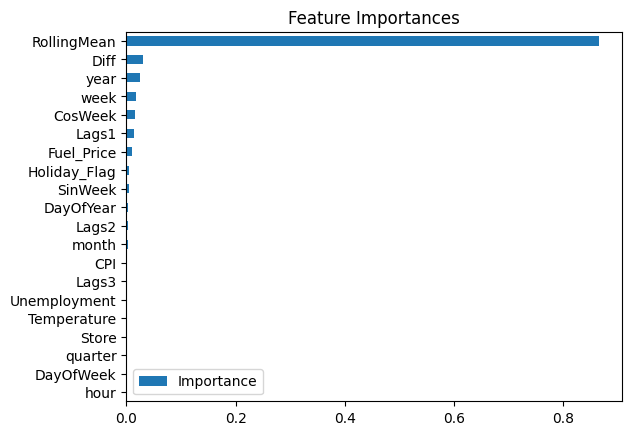

In [9]:
# Save the importance features into dataframe
fi = pd.DataFrame(data = reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns=['Importance'])

# Show the data with viz
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    yReturn, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Training shape: {X_train.shape} targets: {y_train.shape}\n')
print(f'Validation shape: {X_val.shape} targets: {y_val.shape}\n')
print(f'Test shape: {X_test.shape} targets: {y_test.shape}')

Training shape: (4090, 20) targets: (4090, 1)

Validation shape: (1023, 20) targets: (1023, 1)

Test shape: (1279, 20) targets: (1279, 1)


In [11]:
# Set Hyperparameter
reg_return = xgb.XGBRegressor(base_score=0.5,
                              booster='gbtree',
                              n_estimators=1000,
                              early_stopping_rounds=50,
                              objective='reg:linear',
                              max_depth=3,
                              learning_rate=0.01)
# Fit the data
reg_return.fit(X_train, y_train,
               eval_set=[(X_train, y_train), (X_val, y_val)],
               verbose=100)

# Make a prediction
y_pred = reg_return.predict(X_test)

# Calculate the score
score = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'\nScore: {score:.4f}')

[0]	validation_0-rmse:15.41581	validation_1-rmse:18.19395
[100]	validation_0-rmse:10.96945	validation_1-rmse:12.70093
[200]	validation_0-rmse:9.41187	validation_1-rmse:10.86465
[300]	validation_0-rmse:8.62017	validation_1-rmse:10.28804
[400]	validation_0-rmse:8.06282	validation_1-rmse:9.89666
[500]	validation_0-rmse:7.65389	validation_1-rmse:9.61154
[600]	validation_0-rmse:7.31735	validation_1-rmse:9.39379
[700]	validation_0-rmse:7.07057	validation_1-rmse:9.21945
[800]	validation_0-rmse:6.85882	validation_1-rmse:9.08646
[900]	validation_0-rmse:6.66319	validation_1-rmse:8.97423
[999]	validation_0-rmse:6.49739	validation_1-rmse:8.87756

Score: 7.5393


<Axes: title={'center': 'Feature Importances'}>

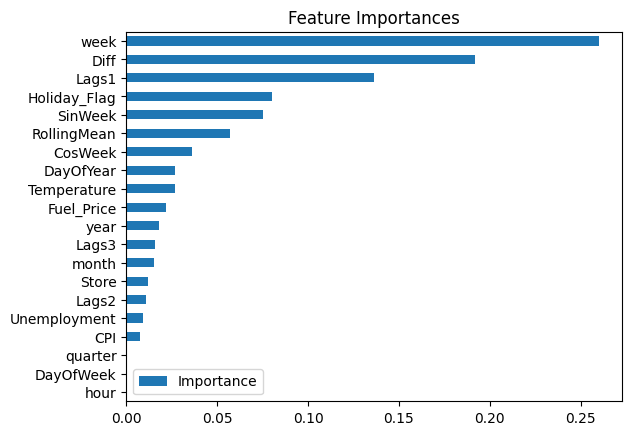

In [12]:
# Save the importance features into dataframe
fi = pd.DataFrame(data = reg_return.feature_importances_,
                  index = reg_return.feature_names_in_,
                  columns=['Importance'])

# Show the data with viz
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    yLogReturn, 
                                                    test_size=0.2,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                    y_train, 
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Training shape: {X_train.shape} targets: {y_train.shape}\n')
print(f'Validation shape: {X_val.shape} targets: {y_val.shape}\n')
print(f'Test shape: {X_test.shape} targets: {y_test.shape}')

Training shape: (4090, 20) targets: (4090, 1)

Validation shape: (1023, 20) targets: (1023, 1)

Test shape: (1279, 20) targets: (1279, 1)


In [14]:
# Set Hyperparameter
reg_log_return = xgb.XGBRegressor(base_score=0.5,
                              booster='gbtree',
                              n_estimators=1000,
                              early_stopping_rounds=50,
                              objective='reg:linear',
                              max_depth=3,
                              learning_rate=0.01)
# Fit the data
reg_log_return.fit(X_train, y_train,
               eval_set=[(X_train, y_train), (X_val, y_val)],
               verbose=100)

# Make a prediction
y_pred = reg_log_return.predict(X_test)

# Calculate the score
score = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'\nScore: {score:.4f}')

[0]	validation_0-rmse:0.51255	validation_1-rmse:0.51251
[100]	validation_0-rmse:0.21064	validation_1-rmse:0.21025
[200]	validation_0-rmse:0.11762	validation_1-rmse:0.11689
[300]	validation_0-rmse:0.09064	validation_1-rmse:0.09137
[400]	validation_0-rmse:0.08259	validation_1-rmse:0.08466
[500]	validation_0-rmse:0.07817	validation_1-rmse:0.08171
[600]	validation_0-rmse:0.07533	validation_1-rmse:0.07978
[700]	validation_0-rmse:0.07243	validation_1-rmse:0.07807
[800]	validation_0-rmse:0.06976	validation_1-rmse:0.07624
[900]	validation_0-rmse:0.06771	validation_1-rmse:0.07485
[999]	validation_0-rmse:0.06591	validation_1-rmse:0.07369

Score: 0.0801


<Axes: title={'center': 'Feature Importances'}>

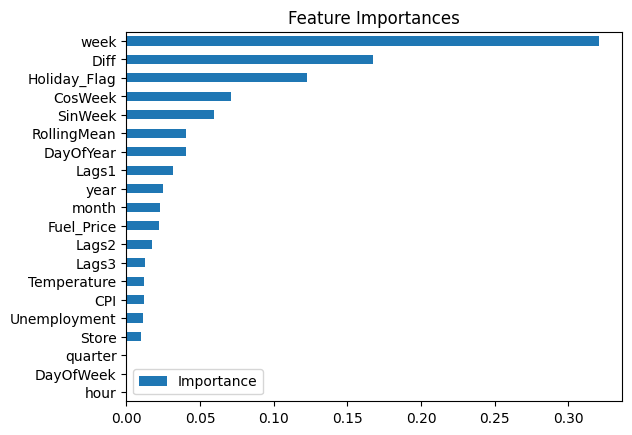

In [15]:
# Save the importance features into dataframe
fi = pd.DataFrame(data = reg_log_return.feature_importances_,
                  index = reg_log_return.feature_names_in_,
                  columns=['Importance'])

# Show the data with viz
fi.sort_values(by='Importance').plot(kind='barh', title='Feature Importances')

# Predict To Future

In [16]:
# Make a data test from range 2012-10-26 - 2013-6-26
future = pd.date_range('2012-10-26', '2013-4-26', freq='1d')

# Create the dataframe
future_df = pd.DataFrame(index=future)

# Mark the data test
future_df['IsFuture'] = True

# Make a copy
df_lag_all = df_pre.copy()
# Add the column into dataset and mark False
df_lag_all['IsFuture'] = False

# Concatenate
DfFuture_all = pd.concat([df_lag_all, future_df])

# Add the feature engineering timeseries and lags
DfFuture_all = CreateTimeSeries(DfFuture_all)
DfFuture_all = add_lags(df=DfFuture_all,
                  lags=range(1, 4),
                  column='Weekly_Sales',
                  num=7)
DfFuture_all = MoreFeatures(df=DfFuture_all,
                      column='Weekly_Sales',
                      n_diff=7)

In [18]:
# Make a copy
FutureWithFeatures_Return = DfFuture_all.query('IsFuture').copy()

# Make a prediction and add to column
FutureWithFeatures_Return['Preds'] = reg_return.predict(FutureWithFeatures_Return.loc[:, Features])

# Show the result
FutureWithFeatures_Return.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Return,LogReturn,hour,...,DayOfYear,Lags1,Lags2,Lags3,Diff,RollingMean,SinWeek,CosWeek,IsFuture,Preds
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,300,702238.27,711671.58,795133.00,NaN,NaN,-0.885456,0.464723,True,1.068429
2012-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,301,723086.20,725729.51,821498.18,NaN,NaN,-0.885456,0.464723,True,1.068429
2012-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,302,713173.95,733037.32,822569.16,NaN,NaN,-0.885456,0.464723,True,1.068429
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,303,733455.07,722496.93,773367.71,NaN,NaN,-0.822984,0.568065,True,0.963845
2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,304,734464.36,718232.26,843361.10,NaN,NaN,-0.822984,0.568065,True,0.963845


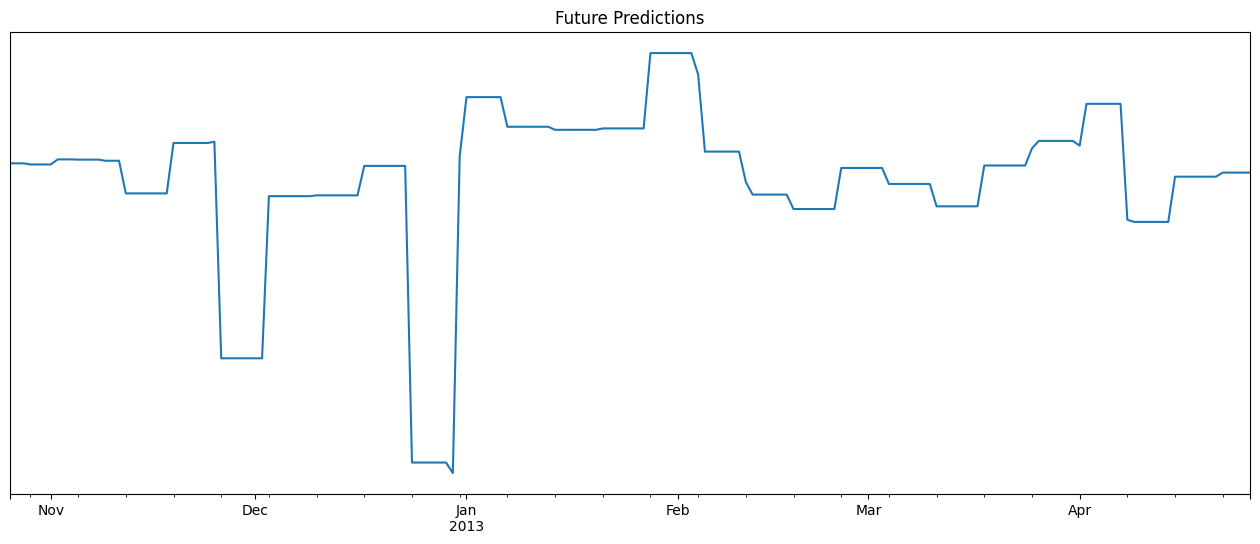

In [26]:
# Plotting
ax = FutureWithFeatures_Return['Preds'].plot(figsize=(16, 6),
                                          title='Future Predictions')

# save file
plt.savefig('images/future_predictions_Return.jpg', dpi=300, bbox_inches='tight')
ax.get_yaxis().set_visible(False)
# Menampilkan plot
plt.show()

In [24]:
# Make a copy
FutureWithFeatures_LogReturn = DfFuture_all.query('IsFuture').copy()

# Make a prediction and add to column
FutureWithFeatures_LogReturn['Preds'] = reg_log_return.predict(FutureWithFeatures_LogReturn.loc[:, Features])

# Show the result
FutureWithFeatures_LogReturn.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Return,LogReturn,hour,...,DayOfYear,Lags1,Lags2,Lags3,Diff,RollingMean,SinWeek,CosWeek,IsFuture,Preds
2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,300,702238.27,711671.58,795133.00,NaN,NaN,-0.885456,0.464723,True,0.028202
2012-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,301,723086.20,725729.51,821498.18,NaN,NaN,-0.885456,0.464723,True,0.028202
2012-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,302,713173.95,733037.32,822569.16,NaN,NaN,-0.885456,0.464723,True,0.028202
2012-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,303,733455.07,722496.93,773367.71,NaN,NaN,-0.822984,0.568065,True,0.027123
2012-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,304,734464.36,718232.26,843361.10,NaN,NaN,-0.822984,0.568065,True,0.027123


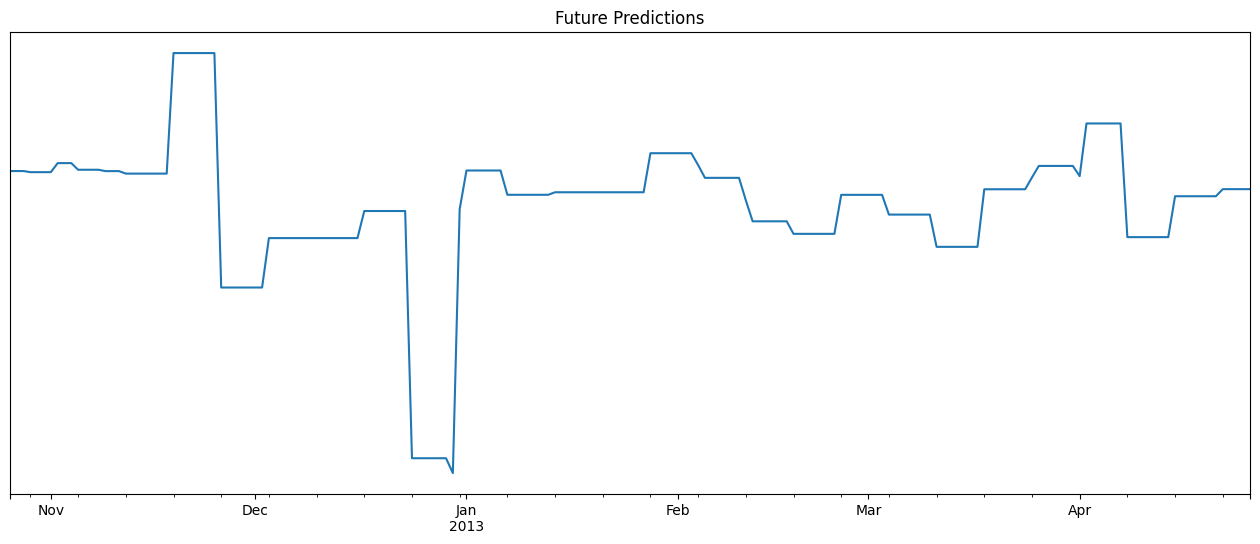

In [27]:
# Plotting
ax = FutureWithFeatures_LogReturn['Preds'].plot(figsize=(16, 6),
                                          title='Future Predictions')

# save file
plt.savefig('images/future_predictions_LogReturn.jpg', dpi=300, bbox_inches='tight')
ax.get_yaxis().set_visible(False)
# Menampilkan plot
plt.show()